In [1]:
pip install pandas numpy scikit-learn matplotlib


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


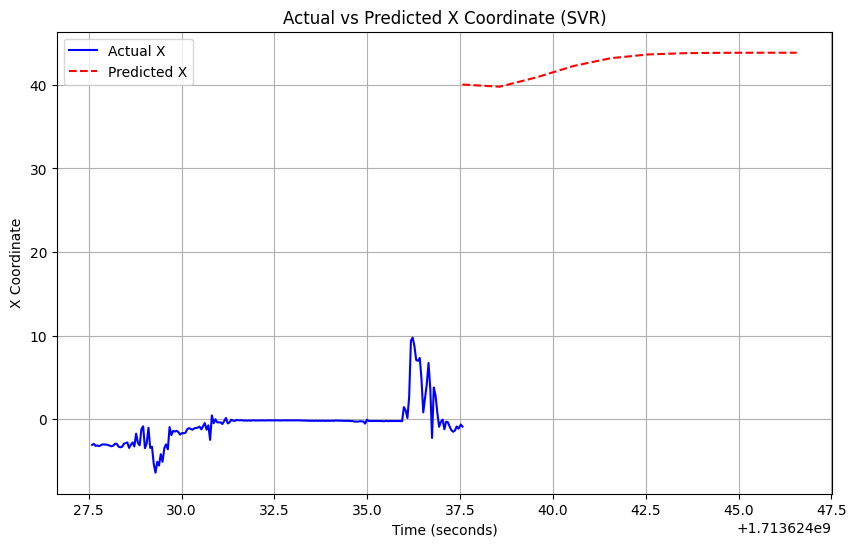

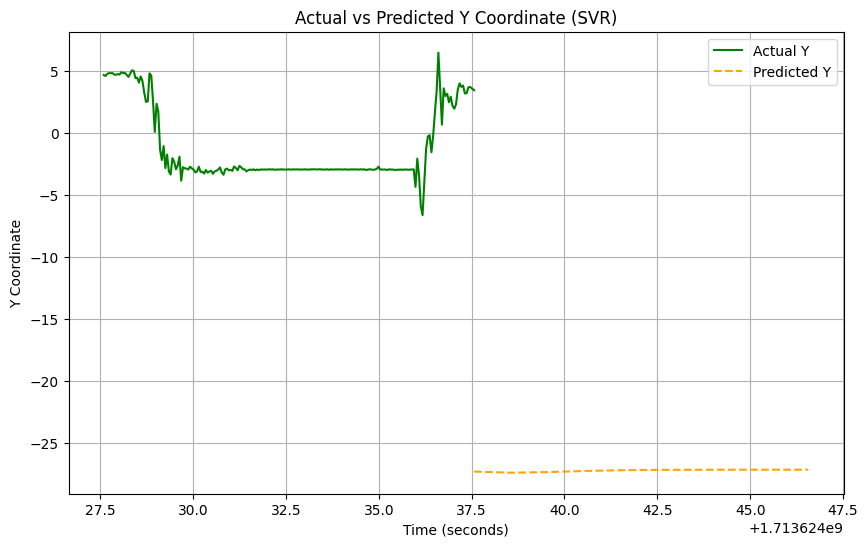

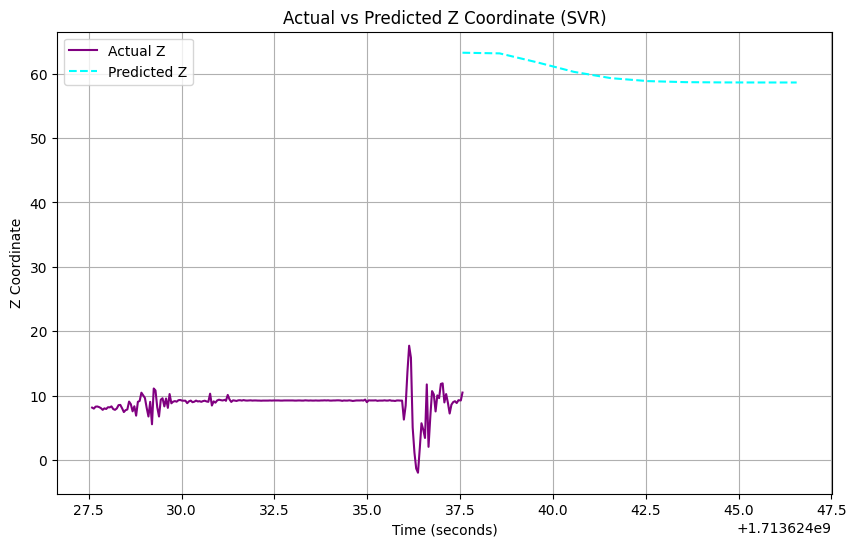

In [15]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Read the data from the file
data = pd.read_csv('stats.txt', header=None, delimiter=',', names=['time', 'x', 'y', 'z'])

# Convert 'time' column to numeric
data['time'] = data['time'] / 1000  # Convert time to seconds (assuming it's in milliseconds)

# Perform interpolation
interpolated_data = data.interpolate(method='linear')

# Initialize SVR models
model_x = SVR(kernel='rbf')  # Radial basis function kernel
model_y = SVR(kernel='rbf')
model_z = SVR(kernel='rbf')

# Fit the models
model_x.fit(interpolated_data[['time']], interpolated_data['x'])
model_y.fit(interpolated_data[['time']], interpolated_data['y'])
model_z.fit(interpolated_data[['time']], interpolated_data['z'])

# Predict the next 10 seconds of values
future_time = np.arange(data['time'].max(), data['time'].max() + 10, 1).reshape(-1, 1)
predicted_x = model_x.predict(future_time)
predicted_y = model_y.predict(future_time)
predicted_z = model_z.predict(future_time)

# Plot actual and predicted values for X coordinate
plt.figure(figsize=(10, 6))
plt.plot(data['time'], data['x'], label='Actual X', color='blue')
plt.plot(future_time.flatten(), predicted_x, label='Predicted X', linestyle='dashed', color='red')
plt.xlabel('Time (seconds)')
plt.ylabel('X Coordinate')
plt.title('Actual vs Predicted X Coordinate (SVR)')
plt.legend()
plt.grid(True)
plt.show()

# Plot actual and predicted values for Y coordinate
plt.figure(figsize=(10, 6))
plt.plot(data['time'], data['y'], label='Actual Y', color='green')
plt.plot(future_time.flatten(), predicted_y, label='Predicted Y', linestyle='dashed', color='orange')
plt.xlabel('Time (seconds)')
plt.ylabel('Y Coordinate')
plt.title('Actual vs Predicted Y Coordinate (SVR)')
plt.legend()
plt.grid(True)
plt.show()

# Plot actual and predicted values for Z coordinate
plt.figure(figsize=(10, 6))
plt.plot(data['time'], data['z'], label='Actual Z', color='purple')
plt.plot(future_time.flatten(), predicted_z, label='Predicted Z', linestyle='dashed', color='cyan')
plt.xlabel('Time (seconds)')
plt.ylabel('Z Coordinate')
plt.title('Actual vs Predicted Z Coordinate (SVR)')
plt.legend()
plt.grid(True)
plt.show()
